## Supervised Learning Module

### Week 4 - Regression

### What is learning in Machine Learning?

1. Gathering a training dataset
2. Building a model based on the training dataset
3. Applying the model to new data and making predictions

We can distinguish: supervised, semi-supervised, unsupervised, and reinforcement learning.

### What is Supervised Learning?

In supervised learning the examples in the dataset are **labeled**.

The dataset $X$ contains $N$ examples.
Each example $x_i$ is represented by a feature vector of dimensionality D: $ x^{(j)} $, $j = 1..D$, meaning that there are D features. A feature can be viewed as a variable.

The **labeled** dataset has a vector of labels $y$ of dimensionality $N$:  $\{(x_i, y_i)\}^{N}_{i=1}$ 

X - dataset

N - samples, observations, instances

y - target(target, response, want to get out, predictions)

### Formulation of regression problems

In regression problems the labels in the dataset are **numeric variables** of type int, float, taking **continuous** values. In other words they are not categoric variables. In statistics labels are called response variables.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target  # note that the labeles are also called targets or response variable

In [3]:
# !pip install --upgrade seaborn

In [4]:
X.shape   # how many examples, how many features in each feature vector?

(506, 13)

In [5]:
y.shape   # how many examples, how many features in each feature vector?

(506,)

In [68]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [7]:
y.shape   # as many labels as examples

(506,)

AttributeError: 'numpy.ndarray' object has no attribute 'Head'

In [9]:
%conda list

# packages in environment at /Users/tom/opt/anaconda3/envs/biof509:
#
# Name                    Version                   Build  Channel
absl-py                   0.9.0                    py37_0    conda-forge
appnope                   0.1.0                 py37_1000    conda-forge
asn1crypto                1.3.0                    py37_0  
astor                     0.7.1                      py_0    conda-forge
attrs                     19.3.0                     py_0    conda-forge
backcall                  0.1.0                      py_0    conda-forge
bleach                    3.1.1                      py_0    conda-forge
c-ares                    1.15.0            h01d97ff_1001    conda-forge
ca-certificates           2019.11.28           hecc5488_0    conda-forge
cctools                   927.0.2              h5ba7a2e_4    conda-forge
certifi                   2019.11.28       py37hc8dfbb8_1    conda-forge
cffi                      1.14.0           py37hb5b8e2f_0  
chardet      

In [9]:
# %matplotlib inline

import pandas as pd
import seaborn as sns

d = pd.DataFrame(X, columns=boston.feature_names)
d['y'] = pd.Series(y)

In [10]:
d.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'y'],
      dtype='object')

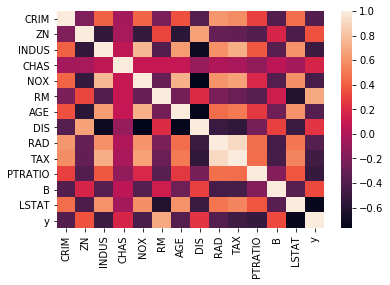

In [11]:
sns.heatmap(d.corr()) #; semicolon to supress plot title bar

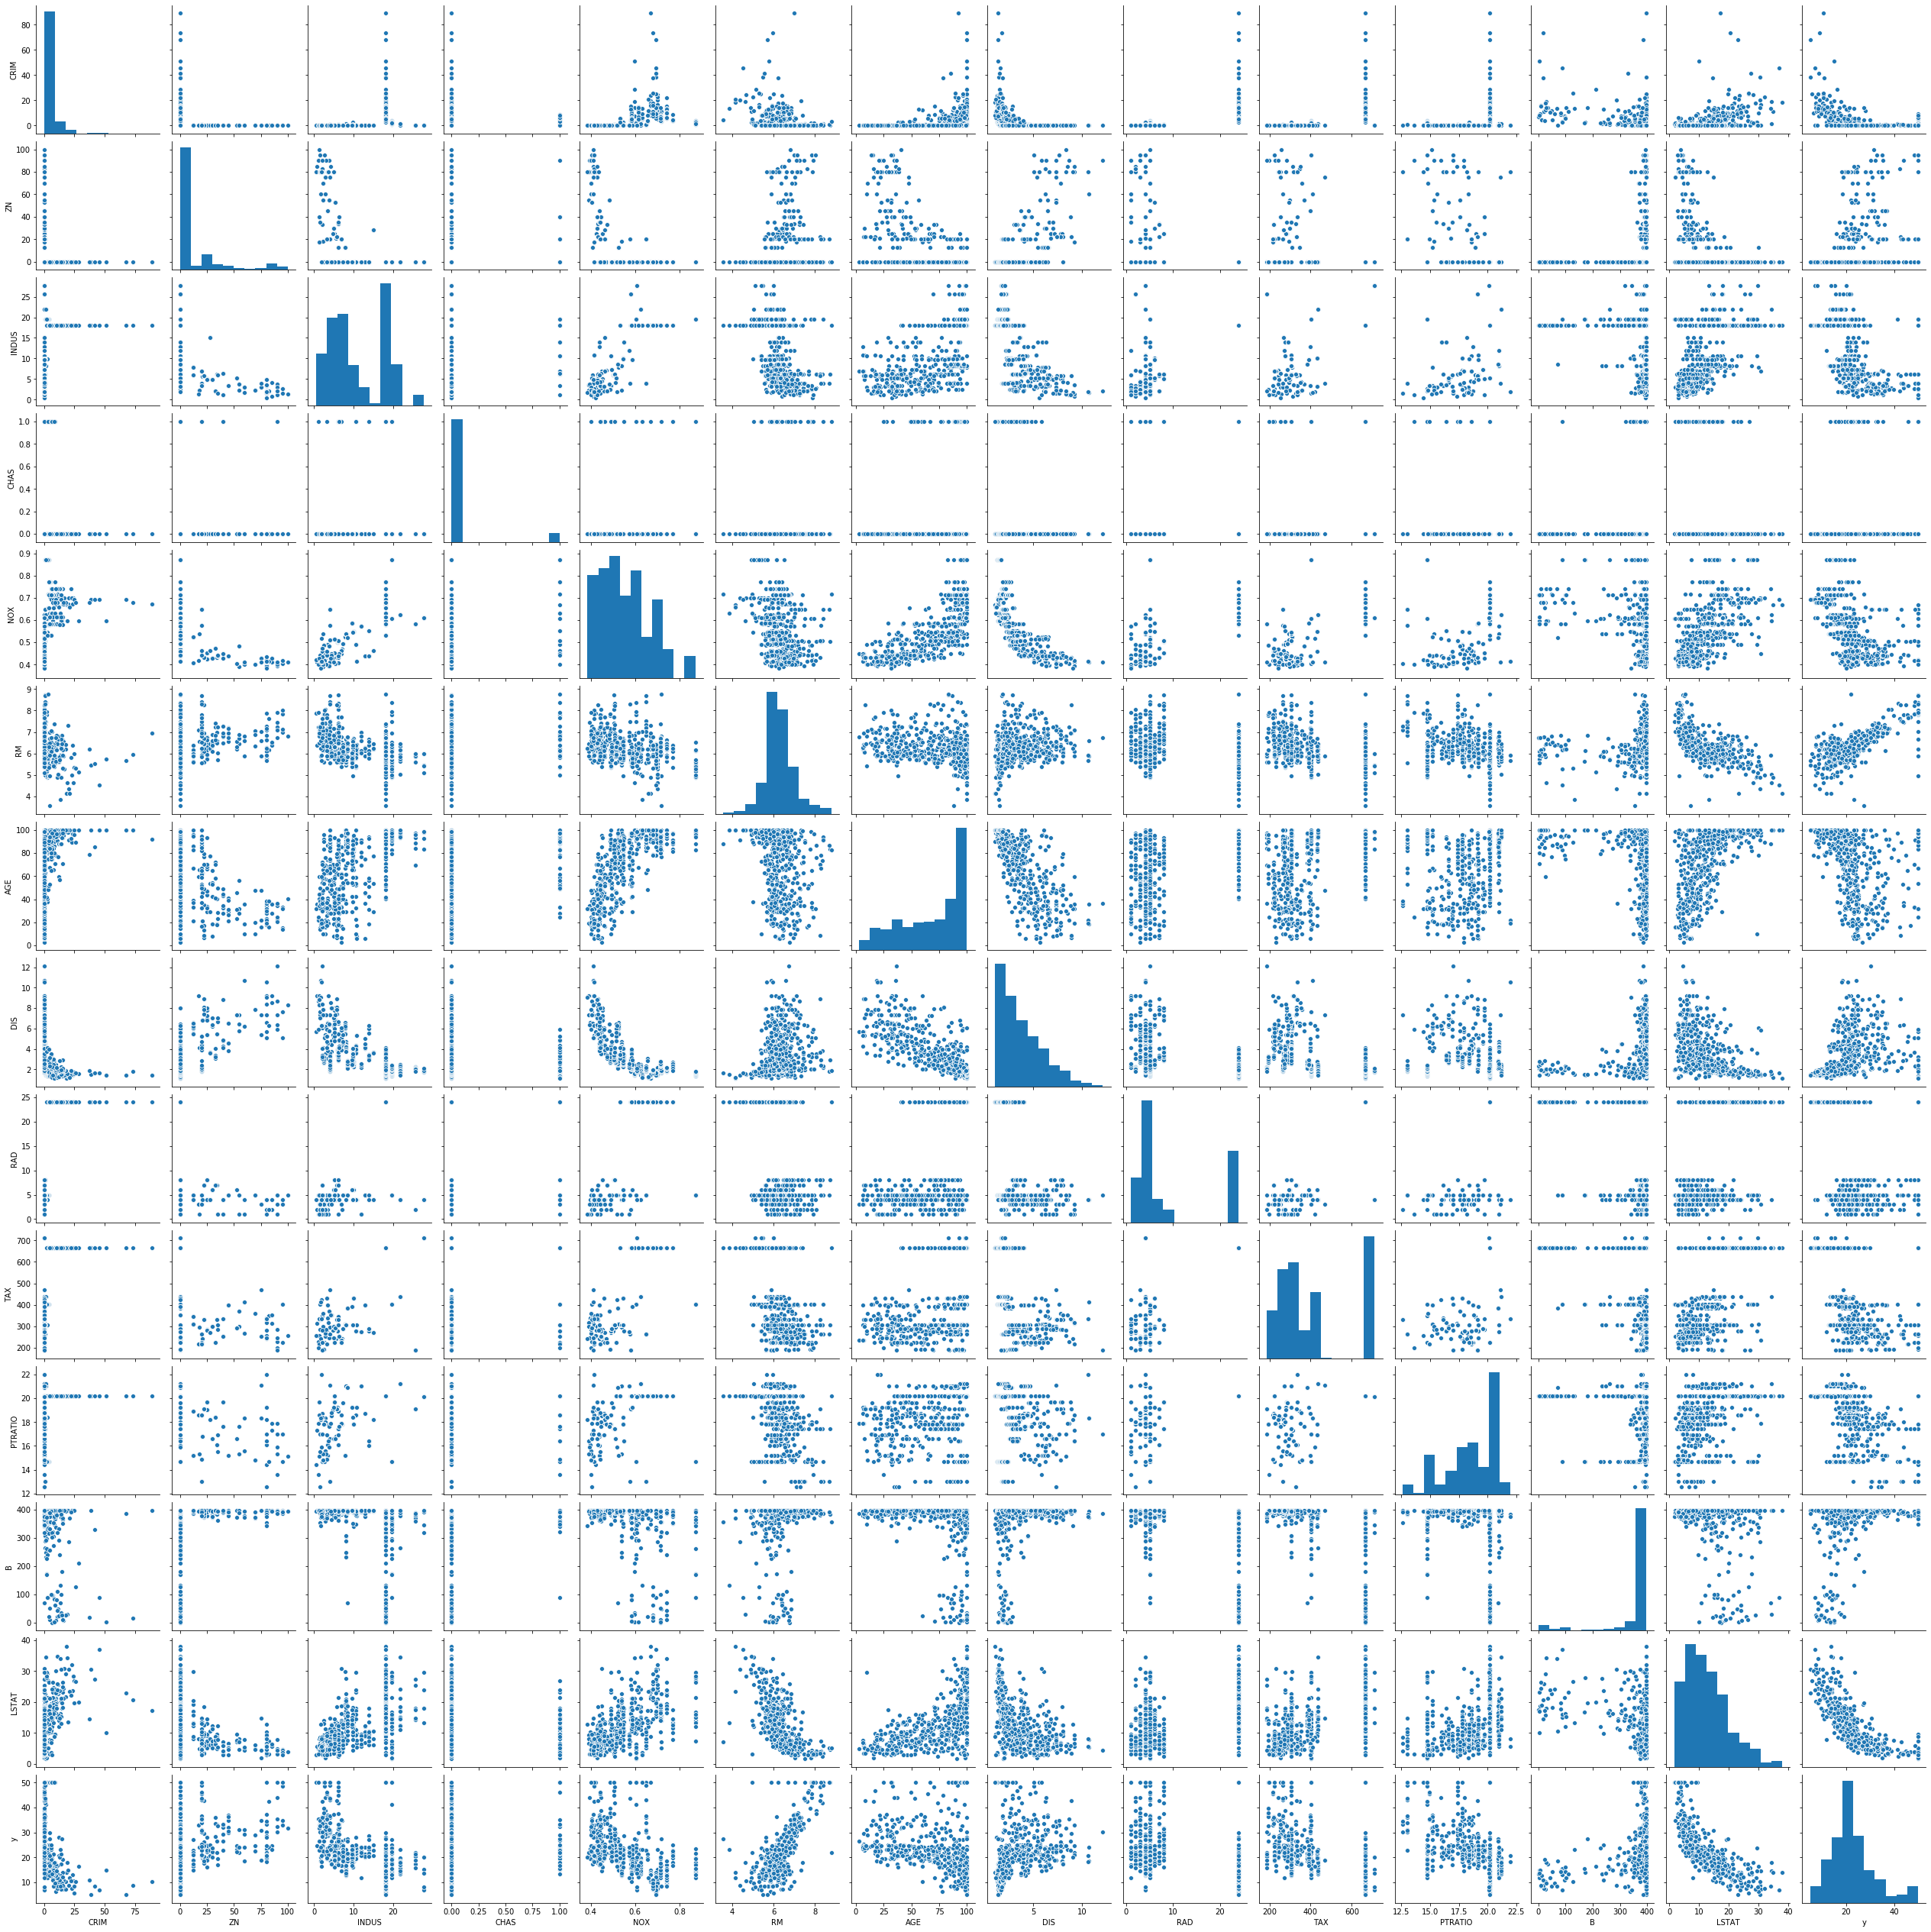

In [14]:
sns.pairplot(d)

Note that some features could be categorical variables

In [12]:
d.columns[12]

'LSTAT'

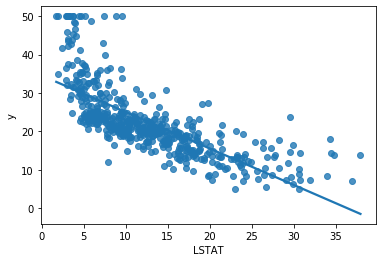

In [13]:
sns.regplot("LSTAT", "y", data=d, ci=None);


In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Machine Learning methods to solve regression problems

We will consider the following methods in this class:

- Linear Regression
- Nearest Neighbors
- Decision Tree
- Random Forest
- Gradient Boosting

Various regularization techniques for regression: Ridge, LASSO will be considered in the next class (adds a penalty to prevent overfitting).

Other methods capable of both regressions and classification we will consider in the classification class.

Neural networks will be considered in Deep Learning module.

### Linear regression and closed form solution

We want to build a model $$f_{w, b}(x) = wx + b$$

so that it would predict us the label given new data $$y = f_{w,b}(x_{new})$$

    w - weight, b - 


We can formulate the training process as a linear algebra problem:

$$ y=w^TX + b$$

$ w $ are the parameters of the model that we are trying to **learn** in the **training** process.

For $b=0$, $w$ could be solved with:

$ w = (X^TX)^{-1}X^Ty $

However, that finding the inverse $(X^TX)^{-1}$ matrix may not be always possible.

In [15]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T@X)@X.T@y

w.shape

(13,)

In [7]:
import numpy as np
# calculate coefficients using closed-form solution
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

w.shape

(13,)

In [16]:
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

**Loss function** measures how good we predict each example. Squared error is commonly used.

$$ SE = (f_{w,b}(x_i)- y_i)^2$$
for example $i$.

In [113]:
i = 80
b = 0 
se = (w.T.dot(X[i]) + b - y[i])**2
se

0.46685390150683787

**Cost function** is loss function for all the training examples. We will use Mean Squared Error
$$ MSE = \frac{1}{N}\sum_{i=1..N}{(f_{w,b}(x_i) - y_i)^2} $$

$$ MSE = \frac{1}{N}\sum_{i=1..N}{((wx_i + b) - y_i)^2} $$

We can find the parameters $w$, $b$ that minimize **cost function** by solving an optimization problem

### Gradient descent method
Gradient shows direction towards the minimum:
$$ \frac{dMSE}{dw} =  \frac{1}{N}\sum_{i=1..N}{-2x_i(y_i - (wx_i + b))} $$

$$ \frac{dMSE}{db} = \frac{1}{N}\sum_{i=1..N}{-2(y_i - (wx_i + b))}$$


By updating $w$ and  $b$ over multiple iterations we converge to the optimal values.
We can control the rate of convergence $\alpha$

$$ w_{updated} = w_{previous} - \alpha\frac{dMSE}{dw} $$

$$ b_{updated} = b_{previous} - \alpha\frac{dMSE}{db} $$

You can now implement linear regression with gradient descent. Rate of convergence $\alpha$ is a hyperparameter.
Gradient descent will allow to use any cost function for which we can express its derivative. Think about other cost functions.

Can you identify by looking at the cost function that normalization of data is critical for Linear Regression or not?

### Sklearn implemenentation



import
instantiate
fit - learn
predict
score


In [17]:
from sklearn. linear_model import LinearRegression

# init
lr = LinearRegression(fit_intercept=False)

# Learning
lr.fit(X, y)

# Learned model w and b:
lr.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [18]:
lr.intercept_

0.0

In [19]:
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [20]:
np.isclose(w, lr.coef_)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [21]:
lr.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)>

In [22]:
# R^2 - coefficient of determination or proportion of explained variance
lr.score(X, y)

0.7137381380515404

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# "predictions" based on the training dataset
y_model = lr.predict(X)  # f(x)
r2_score(y, y_model)  # MSE

0.7137381380515404

In [24]:
y_avg = [np.average(y)]* len(y)

In [25]:
np.sqrt(mean_squared_error(y, y_avg))  # RMSE

9.188011545278203

In [26]:
np.sqrt(mean_squared_error(y, y_model))  # RMSE

4.915902697381885

### Making predictions on new data

In [34]:
# x_new = X[100] * 0.01*np.random.random()  # new example

x_new = np.array([0.01]*13)
print(x_new)

w = lr.coef_
b = lr.intercept_
y_new = np.dot(w, x_new) + b
y_new

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


0.04257850321336146

In [35]:
# or simply:
# lr.predict(x_new.reshape(1, -1))
lr.predict([x_new, ])

array([0.0425785])

### How data normalization effects linear regression

In [36]:
x = 5

In [37]:
x *= 5; x

25

In [38]:
x = x * 5;x

125

In [45]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

In [46]:
median_absolute_error(y, y_model)

2.276217953005723

In [47]:
mean_absolute_error(y, y_model)

3.1344283098176455

In [48]:
from sklearn.preprocessing import normalize

X_copy = X.copy()
X_copy[5] *= 1000000
X_copy[4] *= 0.000001
X_copy[12] *= 0.0001
y_model = LinearRegression(fit_intercept=False).fit(X_copy, y).predict(X_copy)
mean_squared_error(y, y_model)

109.6863509956637

In [49]:
X_norm = normalize(X_copy)
y_model = LinearRegression(fit_intercept=False).fit(X_norm, y).predict(X_norm)
mean_squared_error(y, y_model)

21.6410630103583

In [50]:
mean_absolute_error(y, y_avg)

6.647207423956008

In [51]:
median_absolute_error(y, y_avg)

4.732806324110676

### How outliers affect linear regression?

### Regression with Nearest Neighbors
How do we find nearest neighbor?

How many nearest neighbors?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/500px-KnnClassification.svg.png)

In [52]:
X[0].shape

(13,)

In [53]:
X.shape

(506, 13)

In [54]:
from scipy.spatial.distance import euclidean

euclidean(X[0], X[1])

58.955079696240766

In [55]:
from scipy.spatial.distance import minkowski

euclidean(X[0], X[1])

58.955079696240766

In [56]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [57]:
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [58]:
# distances to 3 closest neighbors
distances

array([[ 0.        , 16.0970999 , 16.99995447],
       [ 0.        , 15.39261599, 18.97631935],
       [ 0.        ,  8.07879279,  8.89317332],
       ...,
       [ 0.        ,  3.94748354,  9.40019876],
       [ 0.        ,  3.94748354,  8.83081803],
       [ 0.        ,  4.2784823 ,  9.31201061]])

In [59]:
# indices of 3 closest neighbors
indices

array([[  0, 241,  62],
       [  1,  47,   2],
       [  2,  85,  87],
       ...,
       [503, 504, 219],
       [504, 503, 219],
       [505, 502, 504]])

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [60]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [61]:
from sklearn.neighbors import KNeighborsRegressor

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
scores = []
for k in range

What is the model in case of Nearest Neighbors?

In [62]:
y_pred_nn = nnr.predict(X)

In [63]:
varname = d.columns[12]

In [67]:
varname

'LSTAT'

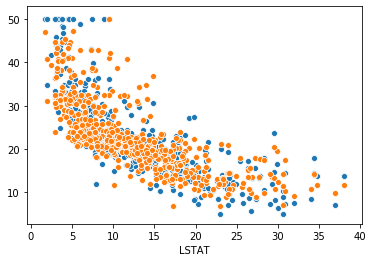

In [65]:
sns.scatterplot(d[varname], y)
sns.scatterplot(d[varname], y_pred_nn)

In [66]:
nnr.score(X, y)

0.7868514704495158

Notice how KNN handles nonlinearity!

Also, what does NNR(n_neighbors=1) mean?

In [176]:
indices = np.random.randint(2, size=X.shape[0]).astype(bool)
# indices

In [177]:
#np.logical_not(indices)

55.813115468409585

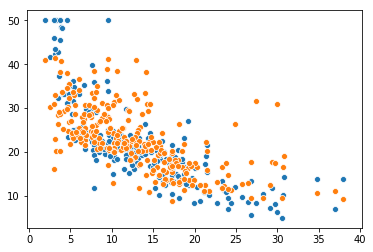

In [178]:
X_train = X[indices]
X_test = X[np.logical_not(indices)]
y_train = y[indices]
y_test = y[np.logical_not(indices)]

nnr = KNeighborsRegressor(n_neighbors=3)
nnr.fit(X_train, y_train)
y_pred_nn = nnr.predict(X_test)

sb.scatterplot(X_test[...,12], y_test)
sb.scatterplot(X_test[...,12], y_pred_nn)

mean_squared_error(y_test, y_pred_nn)

In [ ]:
sb.scatterplot(X_train[...,12], y_train)
y_pred_nn_train = nnr.predict(X_train)
sb.scatterplot(X_train[...,12], y_pred_nn_train)

What are the main hyperparameters of KNN Regressor?
- distance metric
- K

### Rule-based model:
Regression with decision tree

How a tree is built?

Hyperparameters: tree depth, cutoff

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528907338/regression-tree_g8zxq5.png)

In [2]:
from sklearn.tree import DecisionTreeRegressor

# Instanciate regression model
dtr = DecisionTreeRegressor(max_depth=5)

# Fit
dtr.fit(X_train, y_train)

# Predict
y_predicted = dtr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)



from sklearn.model_selection import train_test_split



NameError: name 'X_train' is not defined

In [3]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal no

### Ensemble methods

collection of weak (poor performing) models makes a strong and robust model

### Ensemble methods: bagging - Random Forest

![](https://dsc-spidal.github.io/harp/img/4-5-1.png)

Features:
    - sampling of training examples with replacement
    - subsampling the features
    - shallow trees

In [160]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Fit 
rf.fit(X_train, y_train)

# Predict
y_predicted = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

/Users/agoncear/anaconda/envs/jupyter/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


17.918512295081968

### Ensemble methods: boosting - Gradient Boosting
Sequential improvement of models by training on their errors

![](https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png?w=992)

See also: http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html


In [4]:
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
gbr = GradientBoostingRegressor()

In [161]:
# Fit 
gbr.fit(X_train, y_train)

# Predict
y_predicted = gbr.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

12.666934741997123

In [1]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
X = boston.data
y = boston.target

In [2]:
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create rf instance 
#rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [3]:
# Create grid search instance cross validation
gscv = GridSearchCV(
    gbr, 
    {"max_depth": range(1, 10),
     "n_estimators": range(2, 10), 
     "min_samples_leaf": range(1, 6),
     "min_samples_split": range(2, 10)},
    cv=kf, 
    n_jobs=-1
)

In [4]:
gscv.fit(X, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)

In [5]:
cv_df.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006530,0.000434,0.001672,0.000848,1,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.130907,0.134742,0.164506,0.153102,0.159711,0.148559,0.013440,2841
1,0.003838,0.002218,0.000623,0.000101,1,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.181082,0.192742,0.237070,0.210712,0.197951,0.203866,0.019125,2824
2,0.001527,0.000153,0.000431,0.000026,1,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.239287,0.250423,0.280709,0.274650,0.257039,0.260380,0.015324,2715
3,0.001631,0.000131,0.000566,0.000112,1,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.292949,0.305374,0.332203,0.319610,0.307725,0.311535,0.013356,2376
4,0.002800,0.001373,0.001458,0.001092,1,1,2,6,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.343522,0.340645,0.378196,0.368786,0.327947,0.351803,0.018679,2354
5,0.002625,0.000261,0.000569,0.000098,1,1,2,7,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.373589,0.384834,0.417994,0.405369,0.365177,0.389361,0.019641,2068
6,0.002679,0.000184,0.000558,0.000103,1,1,2,8,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.406604,0.412706,0.444050,0.458306,0.397602,0.423819,0.023253,1939
7,0.002601,0.000093,0.000498,0.000087,1,1,2,9,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.443561,0.447580,0.476183,0.486249,0.429809,0.456650,0.021114,1794
8,0.000953,0.000087,0.000452,0.000076,1,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.130907,0.134742,0.164506,0.153102,0.159711,0.148559,0.013440,2871
9,0.001024,0.000043,0.000383,0.000021,1,1,3,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.181082,0.192742,0.237070,0.210712,0.197951,0.203866,0.019125,2831


In [6]:
cv_df.shape

(2880, 17)

In [7]:
# Create a heatmap-style table
piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)

In [8]:
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)

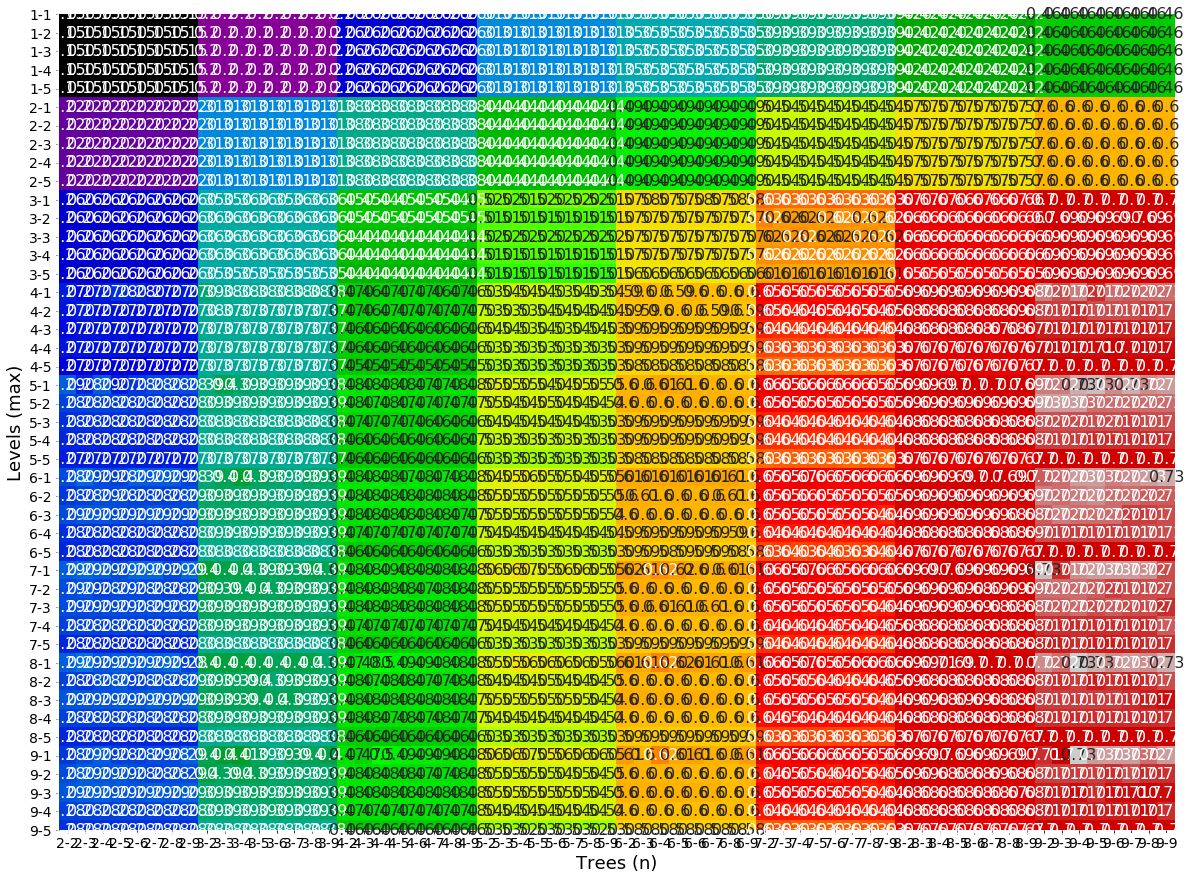

In [9]:
# Or create a heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(piv_df,
            cmap="nipy_spectral",
            cbar=False,
            annot=True,
            annot_kws={"size": 16})
plt.xlabel('Trees (n)', size=18)
plt.ylabel('Levels (max)', size=18)
plt.xticks(size=14)
plt.yticks(rotation=0, size=14);

### Homework assignment

### Notes from chat

from Martin Skarzynski (internal) to Everyone:    7:08  PM
I think the equivalent in scikit-learn is PolynomialFeatures http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
from faysal to Everyone:    7:08  PM
essentially we'd be fitting:
from Martin Skarzynski (internal) to Everyone:    7:09  PM
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from faysal to Everyone:    7:11  PM
yeah I might be confusing myself now, but I guess it depends on what you mean by "exponential regression"
from LauraP to Everyone:    7:11  PM
thank you for the links!!
from Thomas May to Everyone:    7:14  PM
JHU just announced in person classes will NOT resume this semester.
from Martin Skarzynski (internal) to Everyone:    7:18  PM
https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
from Martin Skarzynski (internal) to Everyone:    7:19  PM
https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html
from LauraP to Everyone:    7:54  PM
is it maybe related with the distance from a stable point?
